In [1]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

## Load in the dataset CSV

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Imageomics/HDR-anomaly-challenge/refs/heads/main/files/butterfly_anomaly_train.csv")
df.head()
df

,CAMID,file_url,hybrid_stat,split,zenodo_link,md5,subspecies,parent_subspecies_1,parent_subspecies_2,filename
0,CAM017821,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,ba38c61337e2d720f5f72451387d4a48,NaN,8.0,9.0,CAM017821.jpg
1,CAM017820,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,9a2ff257a0ad17055eae3cc6c279a62b,NaN,8.0,9.0,CAM017820.jpg
2,CAM017693,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,c314eec15bb53750bdd68595d95a5e93,NaN,8.0,9.0,CAM017693.jpg
3,CAM018291,https://zenodo.org/record/2548678/files/CAM018...,non-hybrid,train,https://zenodo.org/record/2548678,e3a7bf83bdb9f11c035873a623a31345,8.0,NaN,NaN,CAM018291.jpg
4,CAM011430,https://zenodo.org/record/2550097/files/CAM011...,non-hybrid,train,https://zenodo.org/record/2550097,5060c653aea379c72802aa3ef8af32b0,9.0,NaN,NaN,CAM011430.jpg
...,...,...,...,...,...,...,...,...,...,...
2077,CAM036201,https://zenodo.org/record/5561246/files/CAM036...,non-hybrid,train,https://zenodo.org/record/5561246,3e3c5d0f40fe04388e021b96d07bcdf6,11.0,NaN,NaN,CAM036201.jpg
2078,CAM036199,https://zenodo.org/record/5561246/files/CAM036...,non-hybrid,train,https://zenodo.org/record/5561246,4b6d73bd76cea08370537d4ccd4dc9ef,11.0,NaN,NaN,CAM036199.jpg
2079,CAM036198,https://zenodo.org/record/5561246/files/CAM036...,non-hybrid,train,https://zenodo.org/record/5561246,d3153f3fac8b98df506895efaf84b23d,11.0,NaN,NaN,CAM036198.jpg
2080,CAM036197,https://zenodo.org/record/5561246/files/CAM036...,non-hybrid,train,https://zenodo.org/record/5561246,d2cd1c4d54e84daae69c048a538a7609,11.0,NaN,NaN,CAM036197.jpg


## Make one column with classification

This is the subspecies (which may is a mix of two for some specimens, the hybrids); this is for coloring the distribution plot by hybrid status and showing all together.

In [6]:
for camid in list(df.loc[df["subspecies"].isna(), "CAMID"]):
    temp = df.loc[df["CAMID"] == camid]
    subspecies = temp["parent_subspecies_1"].astype(str) + " and " + temp["parent_subspecies_2"].astype(str)
    df.loc[df["CAMID"] == camid, "classification"] = subspecies
for camid in list(df.loc[df["subspecies"].notna(), "CAMID"]):
    temp = df.loc[df["CAMID"] == camid]
    subspecies = temp["subspecies"].astype(str)
    df.loc[df["CAMID"] == camid, "classification"] = subspecies

In [7]:
df.head()

,CAMID,file_url,hybrid_stat,split,zenodo_link,md5,subspecies,parent_subspecies_1,parent_subspecies_2,filename,classification
0,CAM017821,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,ba38c61337e2d720f5f72451387d4a48,NaN,8.0,9.0,CAM017821.jpg,8.0 and 9.0
1,CAM017820,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,9a2ff257a0ad17055eae3cc6c279a62b,NaN,8.0,9.0,CAM017820.jpg,8.0 and 9.0
2,CAM017693,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,c314eec15bb53750bdd68595d95a5e93,NaN,8.0,9.0,CAM017693.jpg,8.0 and 9.0
3,CAM018291,https://zenodo.org/record/2548678/files/CAM018...,non-hybrid,train,https://zenodo.org/record/2548678,e3a7bf83bdb9f11c035873a623a31345,8.0,NaN,NaN,CAM018291.jpg,8.0
4,CAM011430,https://zenodo.org/record/2550097/files/CAM011...,non-hybrid,train,https://zenodo.org/record/2550097,5060c653aea379c72802aa3ef8af32b0,9.0,NaN,NaN,CAM011430.jpg,9.0


## Get distribution of images by subspecies (colored by hybrid status)

<Axes: xlabel='Count', ylabel='classification'>

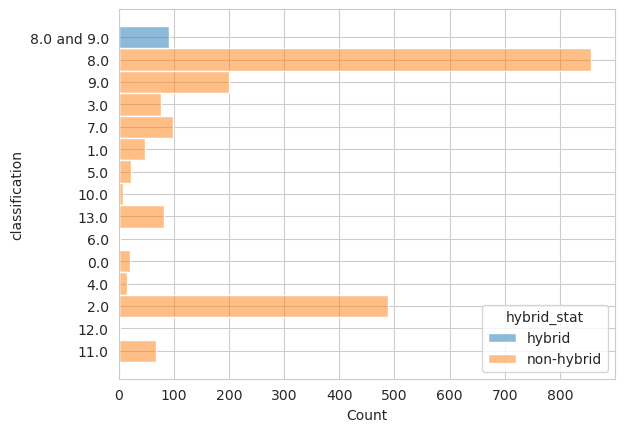

In [8]:
sns.histplot(df, y = "classification", hue = "hybrid_stat")

## Create sample subset of data for example

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Get stratified 15% of the training images for sample run (should take about 12 minutes to download),
# update "test_size" to select more or less sample images.
df_set, df_sample = train_test_split(df, test_size = .15, stratify = df["classification"], random_state = 614)

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 1722 to 1780
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CAMID                313 non-null    object 
 1   file_url             313 non-null    object 
 2   hybrid_stat          313 non-null    object 
 3   split                313 non-null    object 
 4   zenodo_link          313 non-null    object 
 5   md5                  313 non-null    object 
 6   subspecies           299 non-null    float64
 7   parent_subspecies_1  14 non-null     float64
 8   parent_subspecies_2  14 non-null     float64
 9   filename             313 non-null    object 
 10  classification       313 non-null    object 
dtypes: float64(3), object(8)
memory usage: 29.3+ KB


## Download Data

In [14]:
from cautiousrobot.__main__ import download_images
from cautiousrobot.buddy_check import BuddyCheck
from sumbuddy import get_checksums

Download images and validate the download. Note that these will work in one step run in the command line with the following code:
```
cautious-robot -i <path/to/butterfly_anomaly_train.csv> -o <path/to/images> -s hybrid_stat -l 256 -v md5
```
where `<path/to/images>` is `sample_images`.

In [15]:
# set paths
IMG_DIR = "sample_images"
CHECKSUM_PATH = "sample_images_checksums"

In [17]:
download_images(df_sample,
                img_dir = IMG_DIR,
                log_filepath = "sample_img_logs",
                error_log_filepath = "sample_img_error_logs",
                # subfolders = "hybrid_stat",
                downsample_path = "sample_images_downsized",
                downsample = 256
)

100%|██████████| 313/313 [19:29<00:00,  3.74s/it]


In [20]:
# Get checksums of downloaded images
get_checksums(input_path = IMG_DIR,
              output_filepath = CHECKSUM_PATH
              )
        
# verify numbers
checksum_df = pd.read_csv(CHECKSUM_PATH, low_memory = False)
expected_num_imgs = df_sample.shape[0]
print(f"{checksum_df.shape[0]} images were downloaded to {IMG_DIR} of the {expected_num_imgs} expected.")

Calculating md5 checksums on sample_images:   0%|          | 0/313 [00:00<?, ?it/s]

Calculating md5 checksums on sample_images: 100%|██████████| 313/313 [00:03<00:00, 80.35it/s]

md5 checksums for sample_images written to sample_images_checksums
313 images were downloaded to sample_images of the 313 expected.


In [21]:
# Check for all expected image match
buddy_check = BuddyCheck(buddy_id = "filename", buddy_col = "md5")
missing_imgs = buddy_check.validate_download(source_df = df_sample,
                                        checksum_df = checksum_df,
                                        source_validation_col = "md5")
if missing_imgs is not None:
    missing_imgs.to_csv("samples_missing.csv", index = False)
    print(f"See samples_missing.csv for missing image info and check logs.")
else:
    print(f"Buddy check successful. All {expected_num_imgs} expected images accounted for.")

merging on checksums and IDs
Buddy check successful. All 313 expected images accounted for.


In [ ]:
# Save the sample annotation
df_sample.to_csv('./sample_annotation.csv')

## Import training requirements

In [2]:
import torch
import sys
import os
import csv
from pathlib import Path
# Add your path of library
sys.path.append('../DINO_train')
import training

## Load Training Data

In [3]:
training.DATA_FILE = Path('./sample_annotation.csv')
training.IMG_DIR = Path('./sample_images')
train_data, test_data = training.load_data(training.DATA_FILE, training.IMG_DIR)

Filtering bad urls: 0it [00:00, ?it/s]

Filtering bad urls: 313it [00:00, 494.67it/s]

Bad rows: 0


## Model setup


In [4]:
training.DEVICE='cuda' if torch.cuda.is_available() else 'cpu'
model = training.get_dino_model(dino_name='facebook/dinov2-base').to(training.DEVICE)
training.BATCH_SIZE = 4

# Location to save checkpoints and results
training.CLF_SAVE_DIR = Path('./trained_clfs')
os.makedirs(training.CLF_SAVE_DIR, exist_ok=True)

## Start training

In [6]:
# Create dataloader
tr_sig_dloader, test_dl = training.prepare_data_loaders(train_data, test_data)

Created base dataset with 250 samples
Created base dataset with 63 samples


In [7]:
# Extract visual features from model
tr_features, tr_labels, test_features, test_labels = training.extract_features(tr_sig_dloader, test_dl, model)

Extracting features: 100%|██████████| 16/16 [00:02<00:00,  7.97it/s]


In [8]:
# Train classifier with visual features
csv_output, score_output = training.train_and_evaluate(tr_features, tr_labels, test_features, test_labels)

Training and evaluating svm...
Saved svm classifier to trained_clfs/trained_svm_classifier.pkl
svm: Acc - 1.0000, Hacc - 1.0000, NHacc - 1.0000

          Hybrid-Recall: 1.0
          Hybrid-Precision: 0.4
          f1-Score: 0.5714285714285714
          ROC AUC: 0.9754098360655737
          Accuracy: 0.9523809523809523
          
Training and evaluating sgd...
Saved sgd classifier to trained_clfs/trained_sgd_classifier.pkl
sgd: Acc - 0.9800, Hacc - 0.0000, NHacc - 1.0000

          Hybrid-Recall: 1.0
          Hybrid-Precision: 0.4
          f1-Score: 0.5714285714285714
          ROC AUC: 0.9754098360655737
          Accuracy: 0.9523809523809523
          
Training and evaluating knn...
Saved knn classifier to trained_clfs/trained_knn_classifier.pkl
knn: Acc - 1.0000, Hacc - 1.0000, NHacc - 1.0000

          Hybrid-Recall: 1.0
          Hybrid-Precision: 0.4
          f1-Score: 0.5714285714285714
          ROC AUC: 0.9754098360655737
          Accuracy: 0.9523809523809523
          


In [9]:
# Save evaluation results
csv_filename = training.CLF_SAVE_DIR / "classifier_evaluation_results.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Configuration", "AUC", "Precision", "Recall", "F1-score"])
    writer.writerows(csv_output)

# Save individual scores
scores_filename = training.CLF_SAVE_DIR / "classifier_scores.csv"
with open(scores_filename, mode='w', newline='') as score_file:
    score_writer = csv.writer(score_file)
    score_writer.writerow(["Index", "Score", "True Label"])
    score_writer.writerows(score_output)